# A Recommender System for Hero Line-Ups in MOBA Games
<img src="https://www.wallpaperflare.com/static/670/559/794/dota-2-game-characters-hero-wallpaper.jpg" alt="DOTA2" align="left" style="width: 745px;"/>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
%matplotlib inline  

In [2]:
#importing dataset
df_x = pd.read_csv("Datasets/dota2_train.csv")
df_x

,Cluster_ID,gamemode,gametype,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,earthshaker,...,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden,Results
0,223,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,152,2,2,0,0,0,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,1
2,131,2,2,0,0,0,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,1
3,154,2,2,0,0,0,0,0,0,-1,...,-1,0,0,0,0,0,0,0,0,1
4,171,2,3,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87033,156,2,2,0,0,0,0,0,0,0,...,0,0,-1,0,0,0,0,0,0,1
87034,155,2,3,0,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,1
87035,121,2,2,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
87036,188,2,3,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
#Checking the first five rows 
df_x.head(5)

,Cluster_ID,gamemode,gametype,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,earthshaker,...,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden,Results
0,223,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,152,2,2,0,0,0,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,1
2,131,2,2,0,0,0,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,1
3,154,2,2,0,0,0,0,0,0,-1,...,-1,0,0,0,0,0,0,0,0,1
4,171,2,3,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Checking the last five rows 
df_x.tail(5)

,Cluster_ID,gamemode,gametype,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,earthshaker,...,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden,Results
87033,156,2,2,0,0,0,0,0,0,0,...,0,0,-1,0,0,0,0,0,0,1
87034,155,2,3,0,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,1
87035,121,2,2,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
87036,188,2,3,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,1
87037,154,2,2,0,0,0,0,0,-1,0,...,0,0,-1,0,0,0,0,0,0,0


In [5]:
#Checking for missing variables 
df_x.isnull().sum()

Cluster_ID       0
gamemode         0
gametype         0
antimage         0
axe              0
                ..
techies          0
oracle           0
winter_wyvern    0
arc_warden       0
Results          0
Length: 116, dtype: int64

In [6]:
#Gathering information about the number of entires and the data type(s) used in the dataset
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87038 entries, 0 to 87037
Columns: 116 entries, Cluster_ID to Results
dtypes: int64(116)
memory usage: 77.0 MB


In [7]:
#dropping unecessary columns 
Y = df_x['Results']  
X = df_x.drop(['Results'], axis = 1)
X = X.drop(['Cluster_ID', 'gamemode', 'gametype'], axis = 1)

In [8]:
X

,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,earthshaker,juggernaut,mirana,nevermore,...,legion_commander,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,-1,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,-1,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87033,0,0,0,0,0,0,0,-1,1,1,...,0,0,0,-1,0,0,0,0,0,0
87034,0,0,0,0,0,0,0,1,0,0,...,0,-1,0,0,0,0,0,0,0,0
87035,0,0,0,0,0,1,0,-1,0,0,...,0,0,0,0,1,0,0,0,0,0
87036,0,0,0,0,-1,0,0,1,-1,0,...,0,0,0,0,0,0,0,0,0,0


## Apriori Algorithm 

In [9]:
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [10]:
#One hot-encoding 
#We convert the categorical data values to numerical values
#As we are considering only the winning teams, so the value(s) of -1 is converted to 0 
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = X.applymap(encode_units)
basket_sets

,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,earthshaker,juggernaut,mirana,nevermore,...,legion_commander,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87033,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
87034,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
87035,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
87036,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Applying the Apriori Algorithm with support 0.0001 to exctact 2-sized associations
#We use low_memory=True to avoid overflow 
frequent_itemsets = apriori(basket_sets, min_support=0.00012, use_colnames=True, max_len=5, low_memory=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(puck),(antimage),0.024495,0.080080,0.002137,0.087242,1.089436,0.000175,1.007847
1,(antimage),(puck),0.080080,0.024495,0.002137,0.026686,1.089436,0.000175,1.002251
2,(lion),(antimage),0.066362,0.080080,0.005871,0.088470,1.104765,0.000557,1.009204
3,(antimage),(lion),0.080080,0.066362,0.005871,0.073314,1.104765,0.000557,1.007502
4,(antimage),(silencer),0.080080,0.115639,0.009318,0.116356,1.006197,0.000057,1.000811
...,...,...,...,...,...,...,...,...,...
16931,"(enigma, silencer)","(pugna, skeleton_king)",0.010513,0.009375,0.000126,0.012022,1.282302,0.000028,1.002679
16932,"(enigma, skeleton_king)","(pugna, silencer)",0.006744,0.016786,0.000126,0.018739,1.116383,0.000013,1.001991
16933,(pugna),"(enigma, silencer, skeleton_king)",0.162217,0.000747,0.000126,0.000779,1.043240,0.000005,1.000032
16934,(enigma),"(pugna, silencer, skeleton_king)",0.104575,0.001172,0.000126,0.001209,1.031251,0.000004,1.000037


##### We found 16,936 rules for minimum support of 0.01% 

### Association rules for enemies and allies

In [12]:
X

,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,earthshaker,juggernaut,mirana,nevermore,...,legion_commander,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,-1,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,-1,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87033,0,0,0,0,0,0,0,-1,1,1,...,0,0,0,-1,0,0,0,0,0,0
87034,0,0,0,0,0,0,0,1,0,0,...,0,-1,0,0,0,0,0,0,0,0
87035,0,0,0,0,0,1,0,-1,0,0,...,0,0,0,0,1,0,0,0,0,0
87036,0,0,0,0,-1,0,0,1,-1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Including the enemy team for one hot-encoding 
def encode_units(x):
    if x < 0:
        return 1
    if x >= 1:
        return 1
    if x == 0:
        return 0
basket_sets = X.applymap(encode_units)
basket_sets

,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,earthshaker,juggernaut,mirana,nevermore,...,legion_commander,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87033,0,0,0,0,0,0,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0
87034,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
87035,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
87036,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#Applying Apriori algorithm to exctact 2-sized associations
frequent_itemsets = apriori(basket_sets, min_support=.0001, use_colnames=True, max_len=2)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bloodseeker),(antimage),0.126554,0.161504,0.021680,0.171312,1.060727,0.001241,1.011835
1,(antimage),(bloodseeker),0.161504,0.126554,0.021680,0.134239,1.060727,0.001241,1.008877
2,(antimage),(morphling),0.161504,0.112146,0.018187,0.112613,1.004160,0.000075,1.000526
3,(morphling),(antimage),0.112146,0.161504,0.018187,0.162176,1.004160,0.000075,1.000802
4,(puck),(antimage),0.049048,0.161504,0.008330,0.169829,1.051546,0.000408,1.010028
...,...,...,...,...,...,...,...,...,...
2199,(winter_wyvern),(terrorblade),0.028528,0.024357,0.000839,0.029400,1.207033,0.000144,1.005195
2200,(techies),(oracle),0.048645,0.042177,0.002160,0.044402,1.052765,0.000108,1.002329
2201,(oracle),(techies),0.042177,0.048645,0.002160,0.051212,1.052765,0.000108,1.002705
2202,(techies),(arc_warden),0.048645,0.036260,0.001884,0.038734,1.068230,0.000120,1.002574


### Neural Network

In [15]:
from activation import *
from propagation import * 
from cost_function import logistic_loss 
from initialization_of_parameters import * 
from optimizer import *
from prediction import *


np.random.seed(9)

In [16]:
df_x = pd.read_csv("Datasets/dota2_train.csv")
df_x

,Cluster_ID,gamemode,gametype,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,earthshaker,...,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden,Results
0,223,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,152,2,2,0,0,0,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,1
2,131,2,2,0,0,0,1,0,-1,0,...,0,0,0,0,0,0,0,0,0,1
3,154,2,2,0,0,0,0,0,0,-1,...,-1,0,0,0,0,0,0,0,0,1
4,171,2,3,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87033,156,2,2,0,0,0,0,0,0,0,...,0,0,-1,0,0,0,0,0,0,1
87034,155,2,3,0,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,1
87035,121,2,2,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
87036,188,2,3,0,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
Y = df_x['Results']  
X = df_x.drop(['Results'], axis = 1)

In [18]:
X = X.drop(['Cluster_ID', 'gamemode', 'gametype'], axis = 1)

In [19]:
X = X.values[:,:112]
X = np.transpose(X, axes=None)
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
Y = Y.to_numpy()
print(Y)

[0 1 1 ... 1 1 0]


In [22]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.01, num_epochs = 5000, print_cost = True):
    
    L = len(layers_dims)           
    costs = []                      
                       
    parameters = he_init(layers_dims)

    for i in range(num_epochs):
    
        a3, caches = forward_propagation(X, parameters)

        cost = logistic_loss(a3,Y)

        grads = backward_propagation(X,Y, caches)
        
        if optimizer == "gd":
            parameters = GD(parameters, grads, learning_rate)
        
  
        if print_cost and i % 100 == 0:
            print ("Cost after epoch %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
                
  
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

Cost after epoch 0: 0.736861
Cost after epoch 100: 0.717444
Cost after epoch 200: 0.705211
Cost after epoch 300: 0.697113
Cost after epoch 400: 0.691465
Cost after epoch 500: 0.687329
Cost after epoch 600: 0.684170
Cost after epoch 700: 0.681672
Cost after epoch 800: 0.679642
Cost after epoch 900: 0.677957
Cost after epoch 1000: 0.676534
Cost after epoch 1100: 0.675315
Cost after epoch 1200: 0.674260
Cost after epoch 1300: 0.673338
Cost after epoch 1400: 0.672525
Cost after epoch 1500: 0.671804
Cost after epoch 1600: 0.671160
Cost after epoch 1700: 0.670582
Cost after epoch 1800: 0.670060
Cost after epoch 1900: 0.669587
Cost after epoch 2000: 0.669157
Cost after epoch 2100: 0.668763
Cost after epoch 2200: 0.668402
Cost after epoch 2300: 0.668071
Cost after epoch 2400: 0.667764
Cost after epoch 2500: 0.667481
Cost after epoch 2600: 0.667219
Cost after epoch 2700: 0.666974
Cost after epoch 2800: 0.666747
Cost after epoch 2900: 0.666535
Cost after epoch 3000: 0.666336
Cost after epoch 310

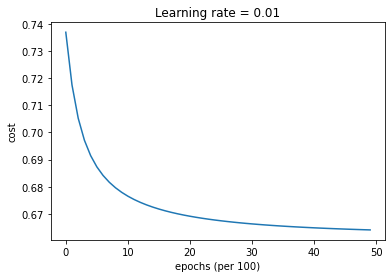

In [23]:
layers_dims = [X.shape[0], 300, 1]
parameters = model(X, Y, layers_dims, optimizer = "gd")

In [24]:
Prediction = predict(X, Y, parameters)

Accuracy: 0.5968312691008526


### Testing The Model

In [25]:
df_x = pd.read_csv("Datasets/dota2_test1.csv")

In [26]:
Y = df_x['Results']  
X = df_x.drop(['Results'], axis = 1)

In [27]:
X = X.drop(['Cluster_ID', 'gamemode', 'gametype'], axis = 1)

In [28]:
X = X.values[:,:112]
X = np.transpose(X, axes=None)
print(X)

[[ 0  0 -1 ...  0  0  0]
 [ 0  0  0 ...  0  0 -1]
 [-1  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [29]:
Y = Y.to_numpy()
print(Y)

[1 1 1 ... 1 0 0]


In [30]:
Prediction = predict(X, Y, parameters)

Accuracy: 0.6092302209550963
